In [9]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os


In [13]:
target = []
images = [] 
flat_data = []




datadir = 'D:\git\Flower-Classification'
categories = ['rose flower','sunflower','Marigold','Daisy']

for category in categories:
  class_index=categories.index(category)
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_matrix=imread(os.path.join(path,img))
    img_resized=resize(img_matrix,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(category)


<>:8: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
C:\Users\harsh\AppData\Local\Temp\ipykernel_2708\455333584.py:8: SyntaxWarning: invalid escape sequence '\g'
  datadir = 'D:\git\Flower-Classification'
C:\Users\harsh\AppData\Local\Temp\ipykernel_2708\455333584.py:8: SyntaxWarning: invalid escape sequence '\g'
  datadir = 'D:\git\Flower-Classification'


NameError: name 'imread' is not defined

In [11]:
import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.024796,0.053541,0.025649,0.033116,0.061909,0.032462,0.047409,0.079541,0.036719,0.061091,...,0.051579,0.116988,0.053873,0.033465,0.072599,0.040938,0.019459,0.047170,0.019632,rose flower
1,0.834181,0.702795,0.676581,0.768980,0.550876,0.553906,0.651043,0.485049,0.470864,0.767157,...,0.842179,0.010710,0.341465,0.904254,0.034557,0.401220,0.887658,0.024106,0.381236,rose flower
2,0.597052,0.689451,0.224266,0.585288,0.674747,0.222798,0.562006,0.647300,0.226959,0.538477,...,0.113719,0.125483,0.152934,0.113719,0.125484,0.152935,0.118867,0.130631,0.158082,rose flower
3,0.113725,0.176470,0.125490,0.111764,0.174509,0.123529,0.107844,0.170589,0.119608,0.105871,...,0.097757,0.213727,0.167087,0.116414,0.208053,0.168418,0.117647,0.207843,0.168627,rose flower
4,0.426340,0.497918,0.360655,0.202962,0.303943,0.140216,0.192900,0.320346,0.127216,0.198776,...,0.387964,0.480861,0.070102,0.370840,0.469855,0.069882,0.533233,0.596249,0.356457,rose flower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.035601,0.102268,0.129719,0.035601,0.102268,0.129719,0.035601,0.102268,0.129719,0.035654,...,0.113131,0.186712,0.179406,0.128276,0.199882,0.183120,0.146966,0.207018,0.181231,Daisy
195,0.333503,0.443321,0.000386,0.323855,0.438528,0.003034,0.292801,0.433507,0.015073,0.276855,...,0.011579,0.216765,0.015360,0.010676,0.198143,0.014488,0.004925,0.189339,0.008733,Daisy
196,0.114882,0.095274,0.016870,0.130664,0.111056,0.032625,0.120257,0.100649,0.022217,0.121356,...,0.000430,0.001161,0.000088,0.000107,0.000069,0.000067,0.000006,0.000014,0.000006,Daisy
197,0.149362,0.330244,0.086857,0.133324,0.275450,0.080992,0.104779,0.199160,0.058728,0.091425,...,0.090861,0.117579,0.067297,0.064991,0.091688,0.057718,0.061217,0.079984,0.049821,Daisy


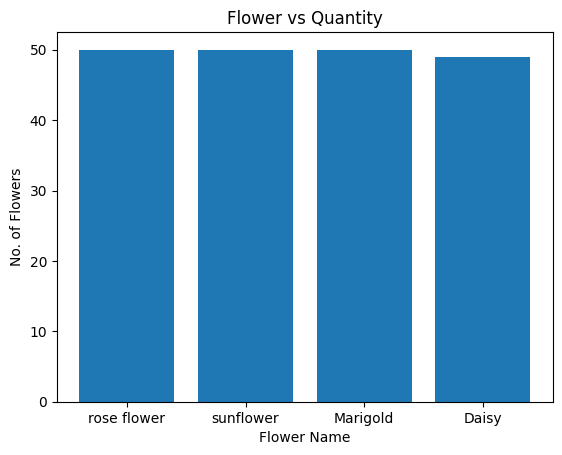

In [13]:
plt.bar(categories,df['Target'].value_counts())
plt.title('Flower vs Quantity')
plt.xlabel('Flower Name')
plt.ylabel('No. of Flowers')
plt.show()

In [14]:
x = df.iloc[:,0:67500].values
y = df.iloc[:,67500].values


In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  

X = imputer.fit_transform(x)


In [17]:
import pandas as pd


X = pd.DataFrame(X)
y = pd.Series(y)
X.dropna(inplace=True)
y = y[X.index] 


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k=np.arange(1,160)
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param)
model_grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159])})

In [19]:
model_grid.best_params_

{'n_neighbors': np.int64(9)}

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [58]:
model = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [59]:
# Predicted output
y_pred = model.predict(x_test)
y_pred

array(['Marigold', 'Daisy', 'Marigold', 'Daisy', 'Daisy', 'Daisy',
       'rose flower', 'Daisy', 'Marigold', 'rose flower', 'sunflower',
       'Marigold', 'rose flower', 'Marigold', 'sunflower', 'rose flower',
       'Daisy', 'sunflower', 'rose flower', 'Marigold', 'Marigold',
       'Marigold', 'rose flower', 'Marigold', 'sunflower', 'Marigold',
       'Daisy', 'Daisy', 'sunflower', 'rose flower', 'rose flower',
       'sunflower', 'sunflower', 'sunflower', 'Marigold', 'Marigold',
       'sunflower', 'rose flower', 'sunflower', 'Daisy', 'Daisy',
       'sunflower', 'rose flower', 'sunflower', 'Marigold', 'sunflower',
       'Marigold', 'sunflower', 'sunflower', 'Daisy'], dtype=object)

In [60]:
#actual result
y_test

18     rose flower
169          Daisy
106       Marigold
92       sunflower
176          Daisy
183          Daisy
5      rose flower
139       Marigold
12     rose flower
160          Daisy
61       sunflower
124       Marigold
164          Daisy
145       Marigold
80       sunflower
7      rose flower
33     rose flower
129       Marigold
37     rose flower
74       sunflower
159          Daisy
144       Marigold
45     rose flower
158          Daisy
60       sunflower
122       Marigold
178          Daisy
184          Daisy
97       sunflower
44     rose flower
16     rose flower
55       sunflower
83       sunflower
110       Marigold
22     rose flower
188          Daisy
135       Marigold
4      rose flower
137       Marigold
193          Daisy
153          Daisy
66       sunflower
26     rose flower
131       Marigold
146       Marigold
63       sunflower
8      rose flower
75       sunflower
98       sunflower
166          Daisy
dtype: object

In [61]:

from sklearn.metrics import accuracy_score
print("The accuracy of the model is ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy of the model is  64.0 %


# pridiction of 1st image


In [62]:

img1=imread('C:/Users/harsh/internship/img/images/Daisy/download.jpeg')
img1_resize = resize(img1,(150,150,3))
img1_flatten = img1_resize.flatten()


In [63]:
img1_pred = model.predict([img1_flatten])
img1_pred

array(['Daisy'], dtype=object)

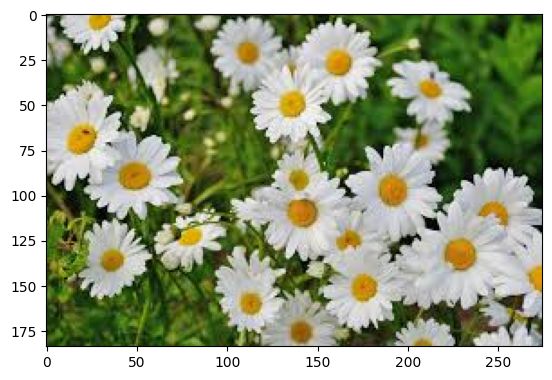

In [64]:
plt.imshow(img1)

# pridiction of second image

In [ ]:

img2=imread('C:/Users/harsh/internship/img/images/Daisy/download.jpeg')
img2_resize = resize(img1,(150,150,3))
img2_flatten = img1_resize.flatten()
